In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('twitter_data/tweets.csv', encoding="ISO-8859-1",
                 names=['target','id','date','flag','user','tweet_text'])
df.head()

,target,id,date,flag,user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# No missing values, nice!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   date        1600000 non-null  object
 3   flag        1600000 non-null  object
 4   user        1600000 non-null  object
 5   tweet_text  1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
print(df.flag.value_counts())
# Redundant column
df = df.drop("flag", axis=1)

flag
NO_QUERY    1600000
Name: count, dtype: int64


### Some Basic EDA

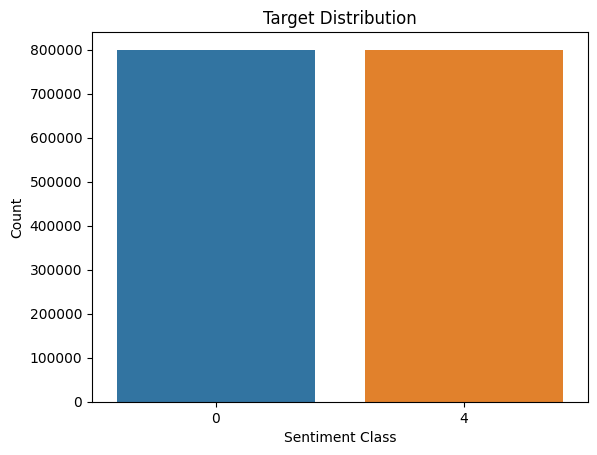

In [6]:
sns.countplot(data=df, x='target')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()
# Plot shows we have a balanced dataset

In [7]:
good_tweets = df.loc[df['target'] == 4, 'tweet_text'].sample(n=10, random_state=42)
for i, tweet in enumerate(good_tweets.tolist()):
    print(f"##TWEET {i+1}:## {tweet}")

##TWEET 1:## Is lookin 4ward to a long weekend  really dont want to go to work 2day tho =[ x
##TWEET 2:## #myweakness  Is music and i live to meet the people who make it 
##TWEET 3:## figured out the Internet on my new iPod 
##TWEET 4:## @hillsongunited can't wait to worship with you guys tonight. it'll be so much fun 
##TWEET 5:## @sillybeggar Congrats James !! I'm sure the book is going to be a huge success 
##TWEET 6:## @DebbyBruck beautiful! when children smile the world smiles 
##TWEET 7:## @bethofalltrades http://twitpic.com/69bs9 - happy birthday! 
##TWEET 8:## @ad_infinitum Why yes, I can. The Ultimate Vegan Guide by Eric Marcus: http://bit.ly/rQp7n You can always ask me anything, you know. 
##TWEET 9:## getting all the writing off of mee. fun nightt 
##TWEET 10:## @noopman Remote? I prefer to be on site.  There's no substitute for working with people in person


In [8]:
bad_tweets = df.loc[df['target'] == 0, 'tweet_text'].sample(n=10, random_state=42)
for i, tweet in enumerate(bad_tweets.tolist()):
    print(f"##TWEET {i+1}:## {tweet}")

##TWEET 1:## @xnausikaax oh no! where did u order from? that's horrible 
##TWEET 2:## A great hard training weekend is over.  a couple days of rest and lets do it again!  Lots of computer time to put in now 
##TWEET 3:## Right, off to work  Only 5 hours to go until I'm free xD
##TWEET 4:## I am craving for japanese food 
##TWEET 5:## Jean Michel Jarre concert tomorrow  gotta work 7-3 before though 
##TWEET 6:## @xPowxBangxBoomx dammiitt!! i wish i had MTV 
##TWEET 7:## @Rohan_01 You know..it's really sad that u know that ur classmate don't care about you..        sad memories T.T
##TWEET 8:## @FaketragedyCom i know 
##TWEET 9:## @JudahGabriel i wish i had that much to say 
##TWEET 10:## ow, i can't move my neck or my back   hurts too much and i don't know why D:


In [9]:
df.head()

,target,id,date,user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
from dateutil import parser
print(df.info())
df['date_parsed'] = df['date'].apply(lambda x: parser.parse(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   date        1600000 non-null  object
 3   user        1600000 non-null  object
 4   tweet_text  1600000 non-null  object
dtypes: int64(2), object(3)
memory usage: 61.0+ MB
None


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   target       1600000 non-null  int64         
 1   id           1600000 non-null  int64         
 2   date         1600000 non-null  object        
 3   user         1600000 non-null  object        
 4   tweet_text   1600000 non-null  object        
 5   date_parsed  1600000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


date_parsed
2009    1600000
Name: count, dtype: int64

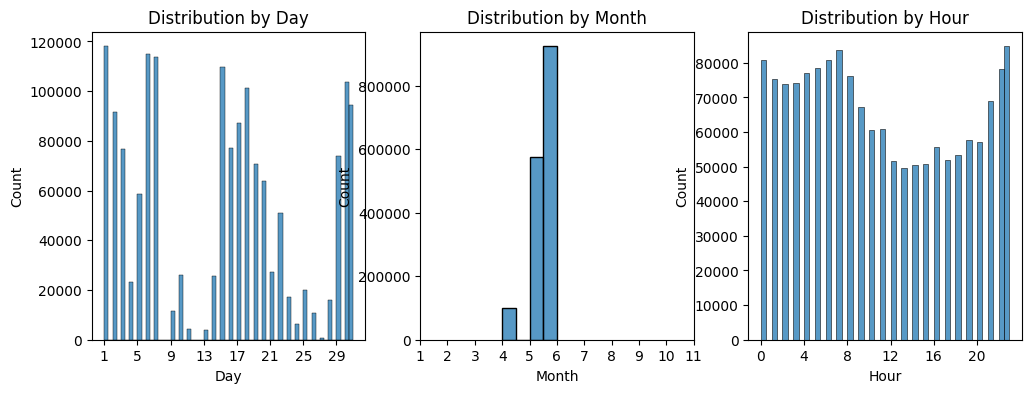

In [7]:
years = df.date_parsed.dt.year
months = df.date_parsed.dt.month
days = df.date_parsed.dt.day
hours = df.date_parsed.dt.hour

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(days, kde=False, ax=axes[0],binwidth=0.5)
axes[0].set_title('Distribution by Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(1, 31, 4))
sns.histplot(months, kde=False, ax=axes[1],binwidth=0.5)
axes[1].set_title('Distribution by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(1, 12))
sns.histplot(hours, kde=False, ax=axes[2],binwidth=0.5)
axes[2].set_title('Distribution by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(0,23,4))
years.value_counts()
# All data from 2009, from months April to June

In [8]:
# We only keep day, month and hour, all tweet come from same year
df['day'] = days
df['month'] = months
df['hour'] = hours
df = df.drop('date', axis=1)
df = df.drop('date_parsed', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   user        1600000 non-null  object
 3   tweet_text  1600000 non-null  object
 4   day         1600000 non-null  int32 
 5   month       1600000 non-null  int32 
 6   hour        1600000 non-null  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 67.1+ MB


In [13]:
df.target.unique()

array([0, 4])

<Axes: xlabel='month', ylabel='count'>

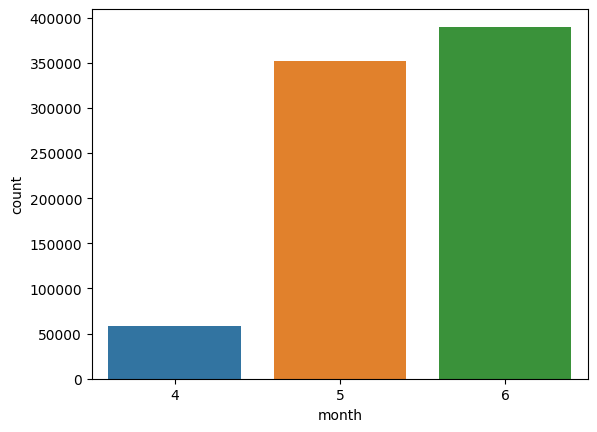

In [14]:
positive_tweets = df[df['target'] == 4]  # Filter positive tweets
positive_tweets_by_month = positive_tweets.groupby('month').size().reset_index(name='count')

sns.barplot(x='month', y='count', data=positive_tweets_by_month)

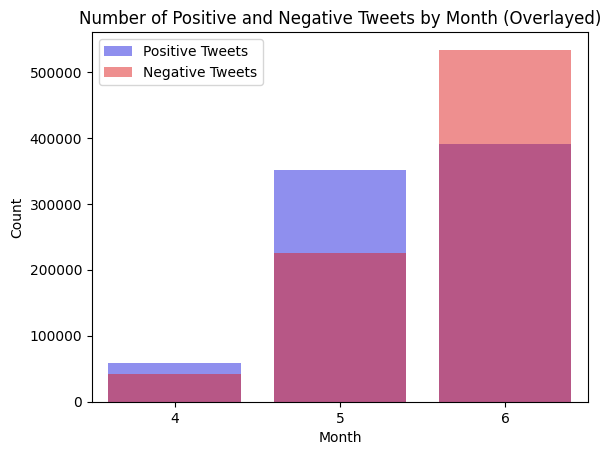

In [15]:
positive_tweets = df[df['target'] == 4]
negative_tweets = df[df['target'] == 0]

positive_tweets_by_month = positive_tweets.groupby('month').size().reset_index(name='positive_count')
negative_tweets_by_month = negative_tweets.groupby('month').size().reset_index(name='negative_count')

merged_counts = positive_tweets_by_month.merge(negative_tweets_by_month, on='month', how='outer').fillna(0)
sns.barplot(x='month', y='positive_count', data=merged_counts, color='blue', alpha=0.5, label='Positive Tweets')
sns.barplot(x='month', y='negative_count', data=merged_counts, color='red', alpha=0.5, label='Negative Tweets')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Tweets by Month (Overlayed)')
plt.legend()
plt.show()

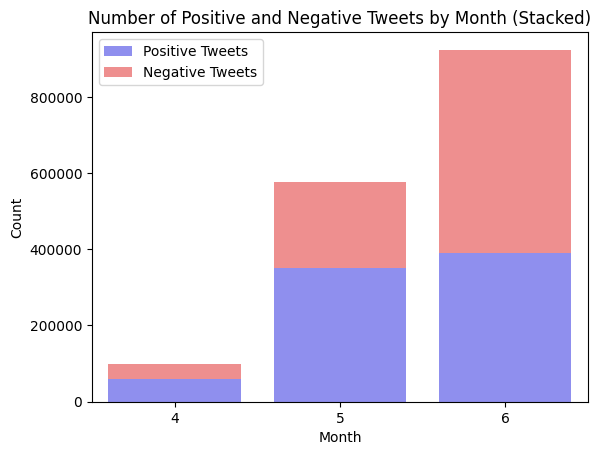

In [16]:
# Stacked bar plot
fig, ax = plt.subplots()
sns.barplot(x='month', y='positive_count', data=merged_counts, color='blue', alpha=0.5, label='Positive Tweets', ax=ax)
sns.barplot(x='month', y='negative_count', data=merged_counts, color='red', alpha=0.5, label='Negative Tweets', ax=ax, bottom=merged_counts['positive_count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Tweets by Month (Stacked)')
plt.legend()
plt.show()

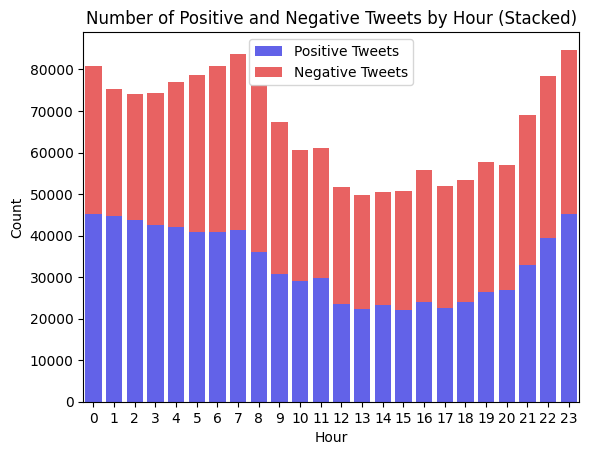

In [17]:
positive_tweets_by_hour = positive_tweets.groupby('hour').size().reset_index(name='positive_count')
negative_tweets_by_hour = negative_tweets.groupby('hour').size().reset_index(name='negative_count')
merged_counts = positive_tweets_by_hour.merge(negative_tweets_by_hour, on='hour', how='outer').fillna(0)

fig, ax = plt.subplots()
sns.barplot(x='hour', y='positive_count', data=merged_counts, color='blue', alpha=0.7, label='Positive Tweets', ax=ax)
sns.barplot(x='hour', y='negative_count', data=merged_counts, color='red', alpha=0.7, label='Negative Tweets', ax=ax, bottom=merged_counts['positive_count'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Tweets by Hour (Stacked)')
plt.legend()
plt.show()

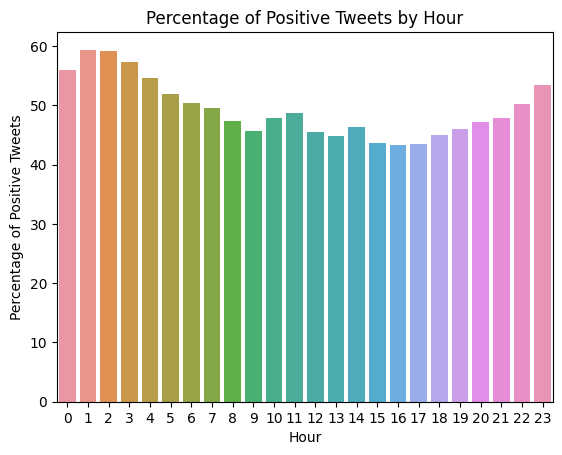

In [18]:
# Clearer to view percentage of positive tweets by hour
positive_tweets_by_hour = positive_tweets.groupby('hour').size().reset_index(name='positive_count')
total_tweets_by_hour = df.groupby('hour').size().reset_index(name='total_count')
percentage_positive = (positive_tweets_by_hour['positive_count'] / total_tweets_by_hour['total_count']) * 100

sns.barplot(x=positive_tweets_by_hour['hour'], y=percentage_positive)
plt.xlabel('Hour')
plt.ylabel('Percentage of Positive Tweets')
plt.title('Percentage of Positive Tweets by Hour')
plt.show()
# positivity seem to spike at around midnight-2am and dips at around 3-5pm

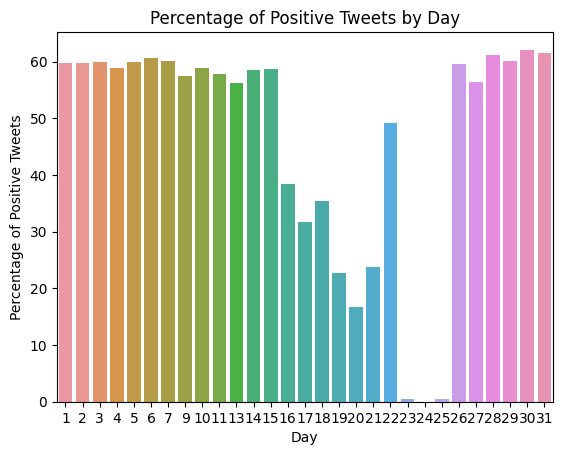

,day,positive_count,total_count,percentage_positive
20,23,95.0,17171,0.553258
21,25,98.0,19863,0.493380


In [19]:
positive_tweets_by_day = positive_tweets.groupby('day').size().reset_index(name='positive_count')
total_tweets_by_day = df.groupby('day').size().reset_index(name='total_count')

merged_counts = positive_tweets_by_day.merge(total_tweets_by_day, on='day', how='outer')
merged_counts['percentage_positive'] = (merged_counts['positive_count'] / merged_counts['total_count']) * 100

sns.barplot(x=merged_counts['day'], y=merged_counts['percentage_positive'])
plt.xlabel('Day')
plt.ylabel('Percentage of Positive Tweets')
plt.title('Percentage of Positive Tweets by Day')
plt.show()

#days 23,24, and 25 abnormal
# 24 only have 800+ tweets with 0 positive tweets, 23 and 25 have abnormally low number of positive tweets
merged_counts[merged_counts.day.isin([23, 25])]

In [20]:
print(df[df['day'] == 23].tweet_text.sample(n=10, random_state=42))

760637    @sherrylam yeah no more millionaires will meet...
759449    It's looking likely that I will have little or...
763890    Whyyy didn't I take a nap when I got home? Sle...
762327    @KimmyT22 So I'm not the only one pissed at he...
770623    @oresteian And I thought growing up in NC was ...
759414                                  Has a bad headache 
766867    @moneymello....no thats not a bad thing at all...
773451    Weee I'm goin up north with my bffl sofia!!!!!...
760380    mending fences.  Literally.  A tree fell acros...
760004    @Bumatay Yes I did, it was so graphic! Such a ...
Name: tweet_text, dtype: object


In [62]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


def score_dataset(X, y, model=XGBClassifier(n_estimators=50,
                                            n_jobs=-1,
                                            verbosity=2,)):  # Use XGBClassifier for classification
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    
    # Metric for categorical classification can be accuracy or other appropriate metrics
    score = cross_val_score(
        model, X, y, cv=5, scoring="accuracy", verbose=1, n_jobs=-1  # Use accuracy or other classification metrics
    )
    score = score.mean()
    return score

## Without cross_val_score
from sklearn.model_selection import KFold

def score_dataset_2(X, y, model=XGBClassifier(n_estimators=50, n_jobs=-1, verbosity=1)):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()

    kf = KFold(n_splits=5)  # Define the number of folds for cross-validation
    scores = []
    
    iteration = 1
    for train_index, val_index in kf.split(X):
        print(f"CV Split {iteration}/5...", end=" ")
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model.fit(X_train, y_train)  # Train the model for each fold
        score = model.score(X_val, y_val)  # Calculate the score for the validation set
        scores.append(score)
        print("Accuracy: ",score)
        iteration += 1

    mean_score = np.mean(scores)  # Calculate the mean score across all folds
    return mean_score

In [50]:
from sklearn.model_selection import train_test_split

# Getting train, val, test splits
# train_df, remaining_df = train_test_split(df, train_size=0.7, random_state=42)
# val_df, test_df = train_test_split(remaining_df, train_size=0.5, random_state=42)

# Getting train, test splits
train_df, test_df = train_test_split(df, train_size=0.85, random_state=42)

print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Train set size: 1360000
Validation set size: 240000
Test set size: 240000


In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_X = train_df.copy()
train_y = train_X.pop("target")
train_y_encoded = label_encoder.fit_transform(train_y)

In [63]:
score_dataset_2(train_X, train_y_encoded)

CV Split 1/5... Accuracy:  0.6408051470588235
CV Split 2/5... Accuracy:  0.6734007352941176
CV Split 3/5... Accuracy:  0.6689742647058824
CV Split 4/5... Accuracy:  0.6774558823529412
CV Split 5/5... Accuracy:  0.6745367647058823


0.6670345588235295

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   user        1600000 non-null  object
 3   tweet_text  1600000 non-null  object
 4   day         1600000 non-null  int32 
 5   month       1600000 non-null  int32 
 6   hour        1600000 non-null  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 67.1+ MB


### Preprocessing Tweets

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/mrdot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mrdot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mrdot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize text
    tokens = word_tokenize(text)
    # removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [11]:
from tqdm import tqdm

# Running this line will avoid tqdm printing multiple lines in Jupyter Lab
tqdm._instances.clear()

pbar = tqdm(total=len(df),desc="Preprocessing Text")

def preprocess_with_progress(text):
    cleaned_text = preprocess_text(text)
    pbar.update(1)
    
    return cleaned_text

df['cleaned_text'] = df['tweet_text'].apply(preprocess_with_progress)

pbar.close()

Preprocessing Text: 100%|███████████████████████████████████████████████████| 1600000/1600000 [04:12<00:00, 6328.18it/s]


In [12]:
# 5 cleaned tweets from positive category
print("Cleaned tweets from positive category:")
print(df[df['target'] == 4]['cleaned_text'].sample(n=5))

# 5 cleaned tweets from negative category
print("Cleaned tweets from negative category:")
print(df[df['target'] == 0]['cleaned_text'].sample(n=5))

Cleaned tweets from positive category:
1448659    [25, mile, workout, Last, 12, mile, nearly, ki...
868809     [hoshin, cool, stuff, Never, FF, though, much,...
1161518    [teatotally, hate, warm, weather, going, sandw...
951976                                    [Got, number, bar]
1222926                             [cate1987, done, thanks]
Name: cleaned_text, dtype: object
Cleaned tweets from negative category:
96178                                       [hate, morning]
551291                                   [Ouch, ouch, ouch]
441997    [AdamHoban, Didnt, get, chance, fair, bir, awa...
575143    [waitingword, Thanks, girrl, Hope, come, sens,...
400760    [mattmcnabb, upset, missed, call, Try, 100, ti...
Name: cleaned_text, dtype: object


In [13]:
df['non_tokenized_cleaned'] = df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))

In [14]:
df.non_tokenized_cleaned.head()

0    switchfoot httptwitpiccom2y1zl Awww thats bumm...
1    upset cant update Facebook texting might cry r...
2    Kenichan dived many time ball Managed save 50 ...
3                      whole body feel itchy like fire
4             nationwideclass behaving im mad cant see
Name: non_tokenized_cleaned, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(train_df['non_tokenized_cleaned'])
# transform the test data using the fitted vectorizer
tfidf_test = vectorizer.transform(test_df['non_tokenized_cleaned'])

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def score_tfidf(tfidf, target):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    logreg_accs = []
    svm_accs = []
    
    splits = 1
    for train_index, test_index in kf.split(tfidf):
        print(f"Split {splits}...")
        X_train, X_test = tfidf[train_index], tfidf[test_index]
        y_train, y_test = target[train_index], target[test_index]

        # Logistic Regression
        logreg = LogisticRegression(n_jobs=-1, random_state=42, max_iter=400)
        logreg.fit(X_train, y_train)
        logreg_pred = logreg.predict(X_test)
        logreg_acc = accuracy_score(y_test, logreg_pred)
        logreg_accs.append(logreg_acc)
        print(f"Logistic Regression: {logreg_acc}%")
        
        # Linear SVM
        svm = LinearSVC(random_state=42)
        svm.fit(X_train, y_train)
        svm_pred = svm.predict(X_test)
        svm_acc = accuracy_score(y_test, svm_pred)
        svm_accs.append(svm_acc)
        print(f"SVM: {svm_acc}%")
        
        splits += 1

    logreg_mean_acc = sum(logreg_accs) / len(logreg_accs)
    svm_mean_acc = sum(svm_accs) / len(svm_accs)

    return logreg_mean_acc, svm_mean_acc

In [ ]:
tfidf = vectorizer.fit_transform(df['non_tokenized_cleaned'])
logreg_acc, svm_acc = score_tfidf(tfidf, df['target'])
print("Logistic Regression Accuracy:", logreg_acc)
print("Linear SVM Accuracy:", svm_acc)

In [133]:
from sklearn.model_selection import train_test_split

# test with only small proportion of data first 
_, tfidf_small, _, target_small = train_test_split(
    tfidf, df['target'], test_size=0.05, random_state=42
)

target_small = target_small.reset_index(drop=True)

In [134]:
logreg_acc, svm_acc = score_tfidf(tfidf_small, target_small)
print("Logistic Regression Accuracy:", logreg_acc)
print("Linear SVM Accuracy:", svm_acc)

Split 1...
Logistic Regression: 0.763%
SVM: 0.7534375%
Split 2...
Logistic Regression: 0.76875%
SVM: 0.758375%
Split 3...
Logistic Regression: 0.7630625%
SVM: 0.7523125%
Split 4...
Logistic Regression: 0.766375%
SVM: 0.753375%
Split 5...
Logistic Regression: 0.76175%
SVM: 0.748125%
Logistic Regression Accuracy: 0.7645875
Linear SVM Accuracy: 0.753125


In [144]:
print(tfidf_small)

  (0, 134176)	0.7181481296687328
  (0, 28303)	0.4926862200903165
  (0, 295941)	0.32001183149596735
  (0, 559674)	0.37298254662787367
  (1, 626217)	0.5779318313798869
  (1, 509869)	0.6074491180941175
  (1, 52431)	0.3974734884889457
  (1, 149654)	0.26695329255506195
  (1, 768150)	0.26029047763413926
  (2, 442901)	0.4651827949397626
  (2, 747391)	0.4522571753966246
  (2, 429452)	0.2917557565561616
  (2, 687355)	0.2985082484684845
  (2, 802634)	0.24759736558638296
  (2, 194319)	0.2656062637627937
  (2, 277413)	0.22915518413827224
  (2, 541045)	0.17457393732741014
  (2, 272636)	0.1745809435912257
  (2, 225943)	0.2020366488776743
  (2, 434024)	0.14155019150091494
  (2, 371265)	0.15780224159076925
  (2, 113866)	0.19647139593746724
  (2, 455130)	0.12906518020016805
  (2, 748970)	0.13603812046066205
  (3, 635960)	0.3958997048619704
  :	:
  (79997, 727452)	0.4163369710600077
  (79997, 821061)	0.4163369710600077
  (79997, 100948)	0.4163369710600077
  (79997, 674200)	0.32687772787285396
  (79997, 

In [145]:
target_small

0        0
1        0
2        0
3        0
4        0
        ..
79995    0
79996    4
79997    4
79998    4
79999    4
Name: target, Length: 80000, dtype: int64

In [148]:
import pickle
import os

positive_tweets = df[df['target'] == 4]
negative_tweets = df[df['target'] == 0]

total_samples = int(len(df) * 0.1)
positive_samples = total_samples // 2
negative_samples = total_samples - positive_samples

positive_sample = positive_tweets.sample(positive_samples)
negative_sample = negative_tweets.sample(negative_samples)

sample_df = pd.concat([positive_sample, negative_sample])

folder_path = 'streamlit'
file_path = os.path.join(folder_path, 'sample_data.pickle')
with open(file_path, 'wb') as f:
    pickle.dump(sample_df, f)

In [19]:
train_X = tfidf_train
train_y = train_df['target']
test_X = tfidf_test
text_y = test_df['target']

In [26]:
trainx, _, trainy, _ = train_test_split(train_X, train_y, train_size=0.1, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

pipeline = Pipeline([
    ('logreg', LogisticRegression(random_state=42, max_iter=500, n_jobs=-1))
])

param_grid = {
    'logreg__C': [1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(trainx, trainy)

best_logreg_model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [44]:
import pickle
with open('streamlit/tfidf_logreg_model.pickle', 'wb') as f:
    pickle.dump(best_logreg_model, f)

In [46]:
import pickle
with open('streamlit/vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

In [31]:
# Function to predict the probability of a tweet being positive
def predict_tweet_probability(tweet):
    cleaned_tweet = preprocess_text(tweet)
    print(cleaned_tweet)
    cleaned_tweet = ' '.join(cleaned_tweet)
    print(cleaned_tweet)
    transformed_tweet = vectorizer.transform([cleaned_tweet])
    # Predict the probability of the tweet being positive
    probability = best_logreg_model.predict_proba(transformed_tweet)[:, 1]
    return probability[0]

In [43]:
tweet = "I hate most women but like some"
probability = predict_tweet_probability(tweet)

if probability > 0.5:
    print(f"Probability that the tweet is positive: {probability * 100:.3g}%")
else:
    print(f"Probability that the tweet is negative: {(1 - probability) * 100:.3g}%")

['hate', 'woman', 'like']
hate woman like
Probability that the tweet is negative: 93.2%


In [48]:
import sklearn
print(sklearn.__version__)

1.2.2
